In [86]:
#import pandas and pyplot and load dataset with LIWC features
import pandas as pd
import matplotlib.pyplot as plt


# load the csv file into a pandas DataFrame
df = pd.read_csv("LIWC_results.csv")


In [87]:
#sanity check
df.head()

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,0,Middle Child,@LegitMeA_,2023-03-01T15:15:42.000Z,Middle Child\n@LegitMeA_\n·\nMar 1,It only takes only 1 day out of 365 days to co...,NaN,2,9,12,...,0.0,0.0,5.00,2.50,0.0,0.0,0.0,0.00,2.50,0.0
1,1,MrHashtag ,@paulwebz1,2023-03-01T15:10:57.000Z,MrHashtag \n@paulwebz1\n·\nMar 1,The #NetizensMarathon will focus on creating m...,NaN,4,15,21,...,0.0,0.0,10.81,8.11,0.0,0.0,0.0,0.00,2.70,0.0
2,2,Sa5m,@Samanthkaitesi,2023-03-01T15:01:43.000Z,Sa5m\n@Samanthkaitesi\n·\nMar 1,Happening in bukoto on the 1st April 2023 is a...,🦋 ❣,1,13,18,...,0.0,0.0,4.17,0.00,0.0,0.0,0.0,0.00,4.17,0.0
3,3,Hope For Us Network,@HopeForUsNet,2023-03-01T20:46:21.000Z,Hope For Us Network\n@HopeForUsNet\n·\nMar 1,(1/2) Today is #SelfInjuryAwarenessDay (SIAD)....,NaN,1,4,4,...,0.0,0.0,28.21,7.69,0.0,0.0,0.0,0.00,20.51,0.0
4,4,Southside Flyers,@SouthsideFlyers,2023-03-01T07:43:08.000Z,Southside Flyers\n@SouthsideFlyers\n·\nMar 1,Southside Flyers will pledge $100 to Lifeline ...,💙 🤲,2,6,20,...,0.0,0.0,9.76,4.88,0.0,0.0,0.0,2.44,2.44,0.0


In [88]:
#create a new df isolating relevant variables from the original data along with tone_pos, tone_neg, emo_pos, and emo_neg variables from LIWC

new_df = df[['UserScreenName','UserName', 'Timestamp', 'Embedded_text', 'Comments', 'Likes', 'Retweets', 'tone_pos', 'tone_neg','emo_pos', 'emo_neg']].copy()

In [89]:
#sanity check

new_df.sample(10)

,UserScreenName,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,tone_pos,tone_neg,emo_pos,emo_neg
257,BlackMugisu__,@aloybrook,2023-03-09T05:16:28.000Z,#NetizensMarathon \nAdvice ;\nCutting ties wit...,2,5,5,0.00,5.26,0.00,2.63
163,Mental Health America,@MentalHealthAm,2023-03-06T20:00:47.000Z,"Back by popular demand, our “Hate is not a men...",1,2,17,2.33,4.65,0.00,4.65
641,KBBI,@kbbiam890,2023-03-23T23:24:00.000Z,The Homer Police Department is hosting a serie...,NaN,2,4,2.70,0.00,0.00,0.00
979,Doryn,@Doreenkasande20,2023-03-29T15:05:45.000Z,Get already for the #NetizensMarathon this Sat...,1,10,17,0.00,3.33,0.00,3.33
810,tomasagodinho,@tomasagodinho,2023-03-27T08:17:05.000Z,I'm riding in The Distinguished Gentleman's Ri...,NaN,6,2,3.33,0.00,0.00,0.00
394,Morris Jeff Community School,@morrisjeff,2023-03-13T19:54:04.000Z,Congratulations to Grade 5 Student of the Year...,NaN,NaN,3,2.33,2.33,2.33,0.00
695,its almost jazzfestchapfunk,@chapstickfunk,2023-03-25T13:05:06.000Z,“Would you like to sign up for a fun run for m...,NaN,NaN,4,4.00,0.00,4.00,0.00
862,Victor Quates,@qtzvictor,2023-03-27T17:33:21.000Z,Personal Development School | Mental Health Aw...,NaN,NaN,NaN,0.00,5.88,0.00,5.88
847,Christopher Moyer,@ELITE_VICTIMZv3,2023-03-27T09:19:02.000Z,Trying This New GTA-V RP Out!!! Come Say Hi!! ...,NaN,NaN,NaN,14.29,0.00,0.00,0.00
876,Mental Wellness Awareness Association,@MWAA_PA,2023-03-28T18:01:53.000Z,Concerned that you or a loved one might be exp...,NaN,NaN,NaN,5.13,2.56,2.56,2.56


In [90]:
#drop any columns that don't have ANY user engagement (NaN for comments, likes, and retweets)
new_df=new_df.dropna(subset=['Comments', 'Likes', 'Retweets'], how= 'all')
new_df=new_df.dropna(subset=['tone_pos', 'tone_neg','emo_pos', 'emo_neg'], how= 'any')

In [91]:
#calculate total user engagement by converting comments, likes, and retweets into integers and finding the sum

new_df['Comments'] = new_df['Comments'].fillna(0).replace({"K":"*1e3", ",":""}, regex=True).map(pd.eval).astype(int)
new_df['Likes'] = new_df['Likes'].fillna(0).replace({"K":"*1e3", ",":""}, regex=True).map(pd.eval).astype(int)
new_df['Retweets'] = new_df['Retweets'].fillna(0).replace({"K":"*1e3", ",":""}, regex=True).map(pd.eval).astype(int)
new_df['User_Engagement']= new_df['Comments']+new_df['Likes']+new_df['Retweets']
new_df

,UserScreenName,UserName,Timestamp,Embedded_text,Comments,Likes,Retweets,tone_pos,tone_neg,emo_pos,emo_neg,User_Engagement
0,Middle Child,@LegitMeA_,2023-03-01T15:15:42.000Z,It only takes only 1 day out of 365 days to co...,2,9,12,5.00,0.00,0.0,0.00,23
1,MrHashtag ,@paulwebz1,2023-03-01T15:10:57.000Z,The #NetizensMarathon will focus on creating m...,4,15,21,5.41,0.00,0.0,0.00,40
2,Sa5m,@Samanthkaitesi,2023-03-01T15:01:43.000Z,Happening in bukoto on the 1st April 2023 is a...,1,13,18,4.17,0.00,0.0,0.00,32
3,Hope For Us Network,@HopeForUsNet,2023-03-01T20:46:21.000Z,(1/2) Today is #SelfInjuryAwarenessDay (SIAD)....,1,4,4,5.13,0.00,0.0,0.00,9
4,Southside Flyers,@SouthsideFlyers,2023-03-01T07:43:08.000Z,Southside Flyers will pledge $100 to Lifeline ...,2,6,20,0.00,0.00,0.0,0.00,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1232,Gingerwitch76,@Gingerwitch7611,2023-03-31T16:45:38.000Z,Brianna Ghey’s Mum and partner are taking part...,0,1,1,2.86,0.00,0.0,0.00,2
1234,Healthiest State Initiative,@HealthiestIowa,2023-03-31T17:09:29.000Z,"Pre-sale has ended, but you can still get your...",0,0,1,3.64,1.82,0.0,1.82,1
1235,Pierre Lequeux,@PierreLeq,2023-03-31T06:05:11.000Z,I'm riding in The Distinguished Gentleman's Ri...,0,0,1,3.33,0.00,0.0,0.00,1
1246,blog jaun,@ShamsaBatool14,2023-03-31T15:05:59.000Z,Mental health expert calls for better BPD awar...,0,0,1,12.50,0.00,0.0,0.00,1


In [92]:
#switching the data from a wide to long format to simplify graphing
graph_df = pd.melt(new_df, id_vars=['UserName', 'tone_pos', 'tone_neg', 'emo_pos', 'emo_neg'], value_vars=['Comments', 'Likes', 'Retweets', 'User_Engagement'])
graph_df.head(15)

,UserName,tone_pos,tone_neg,emo_pos,emo_neg,variable,value
0,@LegitMeA_,5.00,0.00,0.00,0.00,Comments,2
1,@paulwebz1,5.41,0.00,0.00,0.00,Comments,4
2,@Samanthkaitesi,4.17,0.00,0.00,0.00,Comments,1
3,@HopeForUsNet,5.13,0.00,0.00,0.00,Comments,1
4,@SouthsideFlyers,0.00,0.00,0.00,0.00,Comments,2
5,@chriskoriginal,0.00,2.13,0.00,0.00,Comments,1
6,@MopresUg,3.70,0.00,0.00,0.00,Comments,4
7,@TheGolfTrust,5.71,0.00,2.86,0.00,Comments,0
8,@MonticelloCUSD,2.27,0.00,0.00,0.00,Comments,0
9,@Phumelela_,11.43,0.00,0.00,0.00,Comments,0


In [93]:
#using altair, each variable is graphed for 4 different types of engagement: comments, likes, retweets, and user engagement
import altair as alt

base= alt.Chart(graph_df).mark_point().encode(
    x= alt.X('tone_pos:Q', title= 'Positive Tone Scale'),
    y= 'value:Q',
    color= 'variable:N',
    tooltip= ['variable', 'value:Q', 'tone_pos:Q']
).properties(
    width=800,
    height=500)

chart = alt.hconcat()
for variable in ['Comments', 'Likes', 'Retweets', 'User_Engagement']:
    chart |= base.transform_filter(alt.datum.variable == variable)

chart


alt.HConcatChart(...)

In [94]:
base2= alt.Chart(graph_df).mark_point().encode(
    x= alt.X('tone_neg:Q', title= 'Negative Tone Scale'),
    y= 'value:Q',
    color= 'variable:N',
    tooltip= ['variable', 'value:Q', 'tone_neg:Q']
).properties(
    width=800,
    height=500)

chart2 = alt.hconcat()
for variable in ['Comments', 'Likes', 'Retweets', 'User_Engagement']:
    chart2 |= base2.transform_filter(alt.datum.variable == variable)

chart2

alt.HConcatChart(...)

In [95]:
base3= alt.Chart(graph_df).mark_point().encode(
    x= alt.X('emo_pos:Q', title= 'Positive Emotion Scale'),
    y= 'value:Q',
    color= 'variable:N',
    tooltip= ['variable', 'value:Q', 'emo_pos:Q']
).properties(
    width=800,
    height=500)

chart3 = alt.hconcat()
for variable in ['Comments', 'Likes', 'Retweets', 'User_Engagement']:
    chart3 |= base3.transform_filter(alt.datum.variable == variable)

chart3

alt.HConcatChart(...)

In [96]:
base4= alt.Chart(graph_df).mark_point().encode(
    x= alt.X('emo_neg:Q', title= 'Negative Emotion Scale'),
    y= 'value:Q',
    color= 'variable:N',
    tooltip= ['variable', 'value:Q', 'emo_neg:Q']
).properties(
    width=800,
    height=500)

chart4 = alt.hconcat()
for variable in ['Comments', 'Likes', 'Retweets', 'User_Engagement']:
    chart4 |= base4.transform_filter(alt.datum.variable == variable)

chart4

alt.HConcatChart(...)

In [97]:
#import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [98]:
import statsmodels.api as sm

In [99]:
#evaluate the regression results for positive tone

Y = new_df['User_Engagement']
X = new_df['tone_pos']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        User_Engagement   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6971
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.404
Time:                        17:28:43   Log-Likelihood:                -10223.
No. Observations:                1036   AIC:                         2.045e+04
Df Residuals:                    1034   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        378.6254    195.840      1.933      0.0

In [100]:
#evaluate the regression results for negative tone

Y = new_df['User_Engagement']
X = new_df['tone_neg']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        User_Engagement   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3351
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.563
Time:                        17:28:43   Log-Likelihood:                -10223.
No. Observations:                1036   AIC:                         2.045e+04
Df Residuals:                    1034   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.1812    178.703      1.842      0.0

In [101]:
#evaluate the regression results for positive emotion

Y = new_df['User_Engagement']
X = new_df['emo_pos']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        User_Engagement   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5923
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.442
Time:                        17:28:43   Log-Likelihood:                -10223.
No. Observations:                1036   AIC:                         2.045e+04
Df Residuals:                    1034   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.3067    161.491      2.002      0.0

In [102]:
#evaluate the regression results for negative emotion

Y = new_df['User_Engagement']
X = new_df['emo_neg']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        User_Engagement   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.067
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.302
Time:                        17:28:43   Log-Likelihood:                -10223.
No. Observations:                1036   AIC:                         2.045e+04
Df Residuals:                    1034   BIC:                         2.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.8998    168.800      2.120      0.0

In [103]:
#create x and y variables for overall tone

X1 = new_df[['tone_pos','tone_neg']]
Y1 = new_df['User_Engagement']
print(X1)

      tone_pos  tone_neg
0         5.00      0.00
1         5.41      0.00
2         4.17      0.00
3         5.13      0.00
4         0.00      0.00
...        ...       ...
1232      2.86      0.00
1234      3.64      1.82
1235      3.33      0.00
1246     12.50      0.00
1247      0.00      0.00

[1036 rows x 2 columns]


In [104]:
#create x and y variables for overall emotion

X2 = new_df[['emo_pos','emo_neg']]
Y2 = new_df['User_Engagement']
X2.head(10)

,emo_pos,emo_neg
0,0.00,0.0
1,0.00,0.0
2,0.00,0.0
3,0.00,0.0
4,0.00,0.0
5,0.00,0.0
6,0.00,0.0
7,2.86,0.0
8,0.00,0.0
9,0.00,0.0


In [123]:
#split to train and test tone

x1_train, x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size =0.2)
# print the data
x1_train

,tone_pos,tone_neg
347,5.56,0.00
549,8.33,2.08
18,14.00,0.00
176,8.82,2.94
47,0.00,2.63
...,...,...
993,9.30,0.00
283,0.00,0.00
422,10.53,2.63
288,7.50,0.00


In [106]:
#split to train and test emotion

x2_train, x2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size =0.2)
x2_train

,emo_pos,emo_neg
1213,0.00,0.00
896,2.33,0.00
1220,0.00,0.00
29,0.00,2.44
1007,0.00,3.92
...,...,...
1177,0.00,0.00
67,0.00,6.45
442,4.55,2.27
316,0.00,0.00


In [107]:
#import necessary package and set up linear regression model

from sklearn.linear_model import LinearRegression
clf = LinearRegression()


In [124]:
#train and test tone

clf.fit(x1_train,y1_train)
y1_pred= clf.predict(x1_test)

In [125]:
clf.score(x1_test,y1_test)

-28.492135031290875

In [110]:
#train and test emotion
clf.fit(x2_train,y2_train)
y2_pred= clf.predict(x2_test)

In [111]:
clf.score(x2_test,y2_test)

-155.92006470403638

In [112]:
#import necessary packages and tokenize tweets

import nltk
nltk.download('punkt')
from nltk.corpus.reader import wordlist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# tokenizing tweets
tweet_tokenized = []
for tweet in df['Embedded_text']:
    tweet_text=word_tokenize(str(tweet))
    tweet_tokenized.append(tweet_text)

for tokens in tweet_tokenized:
    print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['It', 'only', 'takes', 'only', '1', 'day', 'out', 'of', '365', 'days', 'to', 'come', 'support', 'the', 'Butabika', 'hospital', 'and', 'create', 'more', 'mental', 'health', 'awareness', 'when', 'one', 'joins', 'the', '#', 'NetizensMarathon', 'come', '1st', 'April', '2023', 'at', 'a', 'fee', 'of', 'only', 'fifteen', 'thousand', 'Ugandan', 'shillings', '.']
['The', '#', 'NetizensMarathon', 'will', 'focus', 'on', 'creating', 'more', 'awareness', 'about', 'mental', 'health', 'and', 'helping', 'people', 'in', 'Butabika', '.', 'Come', 'support', 'the', 'cause', 'by', 'buying', 'you', 'running', 'kit', 'at', '15k', '.', 'The', 'run', 'will', 'take', 'place', 'on', '1st', 'April', 'around', 'Bukoto', '.']
['Happening', 'in', 'bukoto', 'on', 'the', '1st', 'April', '2023', 'is', 'a', 'marathon', 'to', 'create', 'mental', 'health', 'awareness', 'in', 'the', 'community', 'Please', 'come', 'join', 'us', '#', 'NetizensMarathon']
['(', '1/2', ')', 'Today', 'is', '#', 'SelfInjuryAwarenessDay', '(', 'S

In [113]:
#remove stopwords from tweets and make all tokens lowercase

nltk.download('stopwords')
from nltk.corpus import stopwords
new_text=[]

for tweet in tweet_tokenized:
  text_without_stop_words = [word.lower() for word in tweet if word.lower() not in stopwords.words("english")]
  new_text.append(text_without_stop_words)

print(new_text[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[['takes', '1', 'day', '365', 'days', 'come', 'support', 'butabika', 'hospital', 'create', 'mental', 'health', 'awareness', 'one', 'joins', '#', 'netizensmarathon', 'come', '1st', 'april', '2023', 'fee', 'fifteen', 'thousand', 'ugandan', 'shillings', '.'], ['#', 'netizensmarathon', 'focus', 'creating', 'awareness', 'mental', 'health', 'helping', 'people', 'butabika', '.', 'come', 'support', 'cause', 'buying', 'running', 'kit', '15k', '.', 'run', 'take', 'place', '1st', 'april', 'around', 'bukoto', '.'], ['happening', 'bukoto', '1st', 'april', '2023', 'marathon', 'create', 'mental', 'health', 'awareness', 'community', 'please', 'come', 'join', 'us', '#', 'netizensmarathon'], ['(', '1/2', ')', 'today', '#', 'selfinjuryawarenessday', '(', 'siad', ')', '.', 'self-injury', 'common', 'amongst', 'experiencing', 'mental', 'health', 'challenges', '.', '18+', 'years', 'siad', 'global', 'awareness', 'event', 'focuses', 'increasing', 'education', 'support', 'often', 'misrepresented', 'misunderstoo

In [114]:
#create a flat list and calculate unigram frequency

flat_list = [item for sublist in new_text for item in sublist]
unigram_frequency_distribution = nltk.FreqDist(flat_list)
tweet_unigrams = [ (unigram, unigram_frequency_distribution[unigram]) for unigram in unigram_frequency_distribution]

print(tweet_unigrams[:20])

[('health', 1474), ('mental', 1469), ('.', 1436), ('awareness', 1214), ('#', 1170), (',', 1095), ('@', 612), (':', 557), ('!', 430), ('’', 326), ('https', 241), ("'s", 239), ('&', 232), ('raise', 202), ('support', 165), ('help', 149), ('day', 141), ('?', 137), ('us', 121), ('-', 117)]


In [115]:
#calculate bigram frequency

text_for_bigrams = nltk.ngrams(flat_list, 2)
bigram_frequency_distribution = nltk.FreqDist(text_for_bigrams)
tweet_bigrams = [ (' '.join(bigram), bigram_frequency_distribution[bigram]) for bigram in bigram_frequency_distribution ]
print(tweet_bigrams[:20])

[('mental health', 1373), ('health awareness', 593), ('https :', 241), ('awareness mental', 184), ('raise awareness', 162), ('. #', 140), ('health .', 129), ('http :', 98), ('awareness .', 92), ('# mentalhealth', 76), ('! !', 70), ('# mentalhealthawareness', 63), ('raising awareness', 58), ('# netizensmarathon', 56), ('awareness month', 56), ('awareness ,', 55), (': https', 55), (', mental', 54), ('awareness week', 53), ('. ’', 51)]


In [116]:
#calculate trigram frequency 
text_for_trigrams = nltk.ngrams(flat_list, 3)
trigram_frequency_distribution = nltk.FreqDist(text_for_trigrams)
tweet_trigrams = [ (' '.join(trigram), trigram_frequency_distribution[trigram]) for trigram in trigram_frequency_distribution ]
print(tweet_trigrams[:20])

[('mental health awareness', 580), ('awareness mental health', 180), ('mental health .', 115), ('raise awareness mental', 79), ('health awareness .', 66), (': https :', 55), (', mental health', 50), ('mental health issues', 49), ('# mentalhealth #', 49), ('. mental health', 41), ('health awareness week', 39), ('# mentalhealthawareness #', 37), ('! ! !', 36), ('health awareness month', 35), ('. https :', 31), ("'s mental health", 31), ('mental health ,', 30), ('’ mental health', 29), (". let 's", 26), ('| mental health', 24)]


In [117]:
#create a list of unigrams, bigrams, and trigrams of keywords that were used in scraping the data

keywords=['depression','anxiety', 'bipolar', 'mental health', 'counseling', 'self care', 'burnout', 'mental health awareness']
keyword_appearances={}

for word, value in tweet_unigrams:
  if word in keywords:
    keyword_appearances[word]= (value)

for word, value in tweet_bigrams:
  if word in keywords:
    keyword_appearances[word]= (value)

for word, value in tweet_trigrams:
  if word in keywords:
    keyword_appearances[word]= (value)

sorted_keyword_appearances = sorted(keyword_appearances.items(), key=lambda x:x[1], reverse=True)
sorted_keyword_appearances= dict(sorted_keyword_appearances)
print(sorted_keyword_appearances)

{'mental health': 1373, 'mental health awareness': 580, 'bipolar': 44, 'depression': 30, 'anxiety': 27, 'counseling': 4, 'self care': 3, 'burnout': 1}


In [118]:
#convert keyword appearances into a dataframe

keywords_df= pd.DataFrame.from_dict(sorted_keyword_appearances, orient='index', columns= ['occurrences'])
keywords_df.reset_index()
keywords_df.head()

,occurrences
mental health,1373
mental health awareness,580
bipolar,44
depression,30
anxiety,27


Text(0, 0.5, 'keyword')

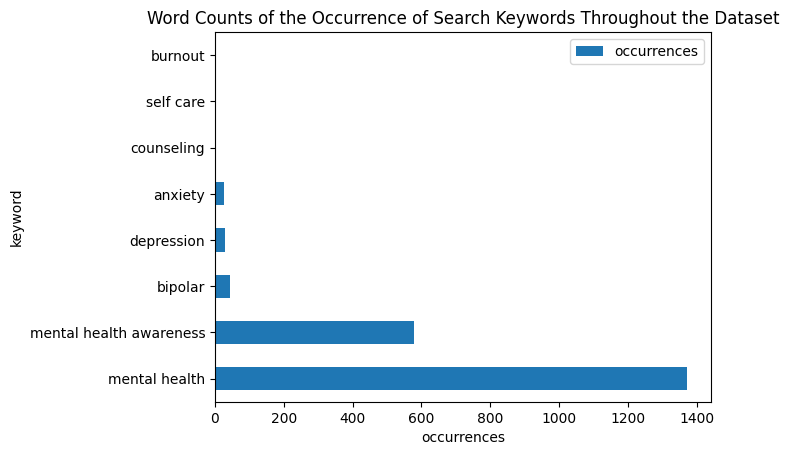

In [119]:
#create a bar chart of the occurences of each key word

ax= keywords_df.plot.barh(y= 'occurrences', title= 'Word Counts of the Occurrence of Search Keywords Throughout the Dataset')
ax.set_xlabel("occurrences")
ax.set_ylabel("keyword")